In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",None)
%matplotlib inline
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,LabelEncoder,MinMaxScaler
from sklearn.model_selection import GridSearchCV,train_test_split
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings(action='ignore', category=UserWarning, module='lightgbm')

In [2]:
df=pd.read_csv(r"C:\Users\Akbarova Sabina\Downloads\DATASET_FOR_LOAN.csv")

In [3]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
df.shape

(614, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
print('{} of data is duplicated rows'.format(
     str(round(df.duplicated().sum() / df.size * 100.5))+'%'))
print('')
print('number of duplicate rows:', df.duplicated().sum())

0% of data is duplicated rows

number of duplicate rows: 0


In [9]:
df['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [10]:
df['Loan_Status'].value_counts(normalize=True)

Loan_Status
Y    0.687296
N    0.312704
Name: proportion, dtype: float64

# EDA

Text(0.5, 1.0, 'distribition_of_LoanAmount')

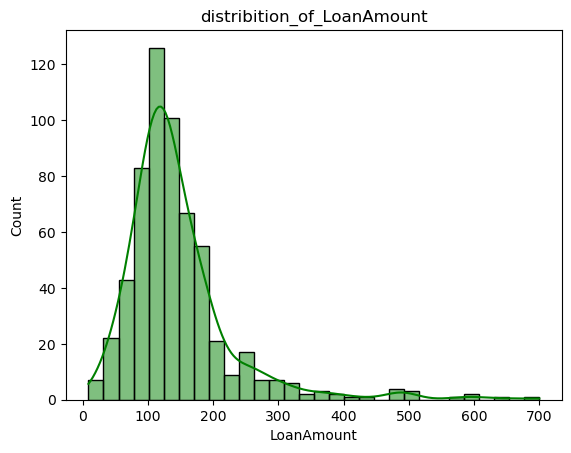

In [11]:
sns.histplot(df['LoanAmount'].dropna(), kde=True, bins=30, color='Green').set_title('distribition_of_LoanAmount')

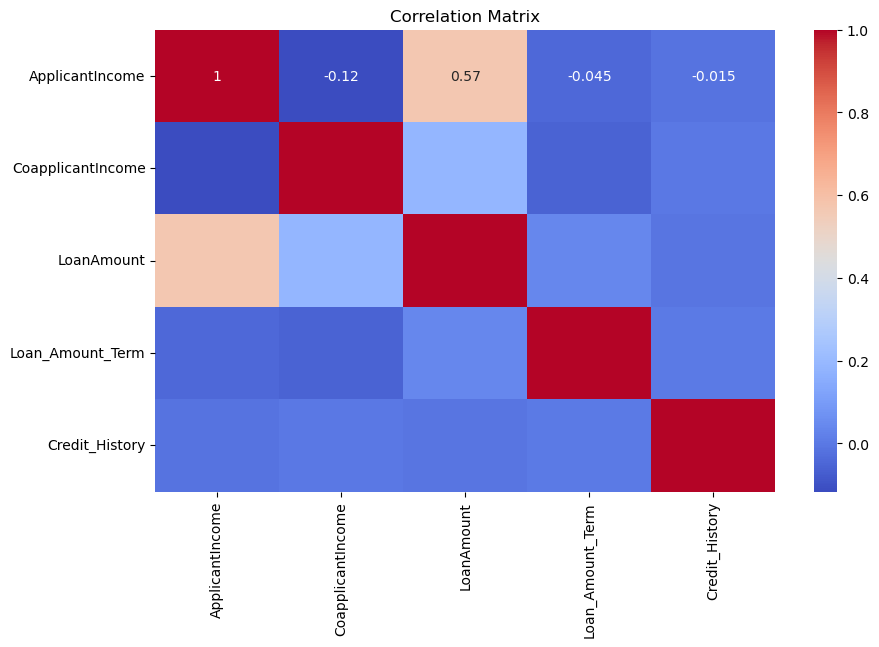

In [12]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

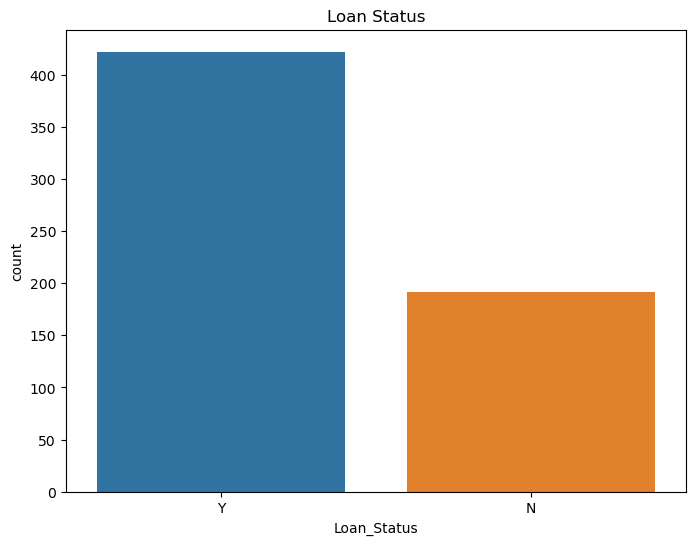

In [13]:
plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Status', data=df)
plt.title('Loan Status')
plt.show()

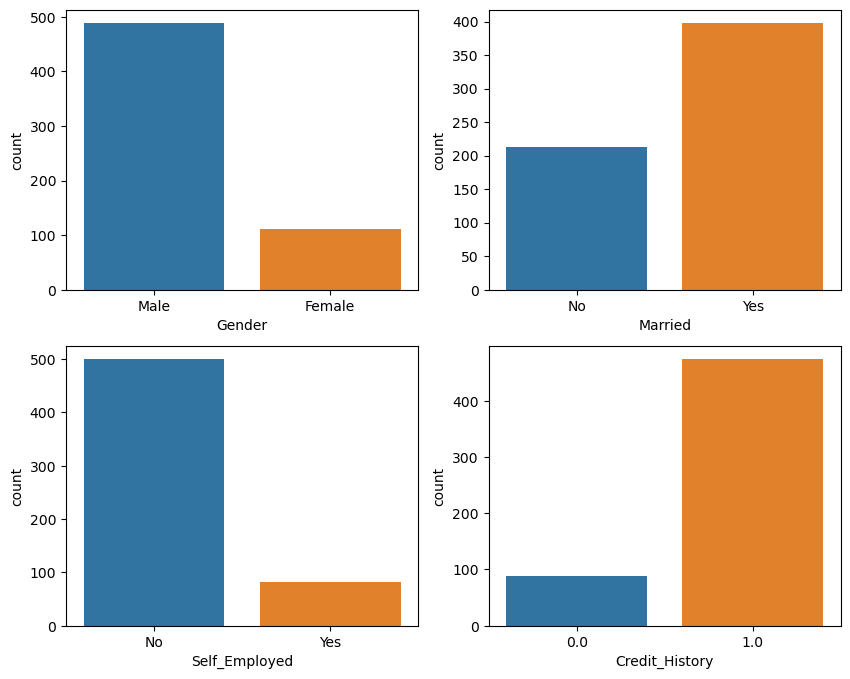

In [14]:
plt.figure(figsize=(10,8))
plt.subplot(221)
sns.countplot(x='Gender',data=df)
# plt.title('Gender')
plt.subplot(222)
sns.countplot(x='Married',data=df)
# plt.title('Married')
plt.subplot(223)
sns.countplot(x='Self_Employed',data=df)
# plt.title('Self_Employed')
plt.subplot(224)
sns.countplot(x='Credit_History',data=df)
# plt.title('Credit_History')
plt.show()

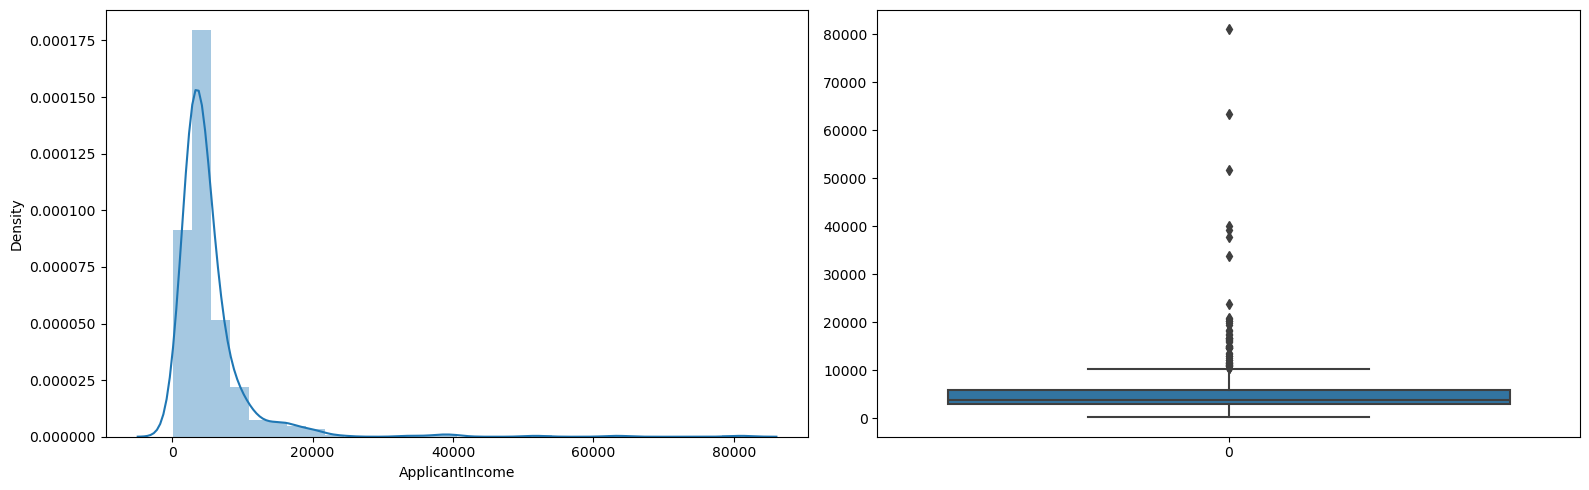

In [15]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['ApplicantIncome'],bins=30)
plt.subplot(122)
sns.boxplot(df['ApplicantIncome'])
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

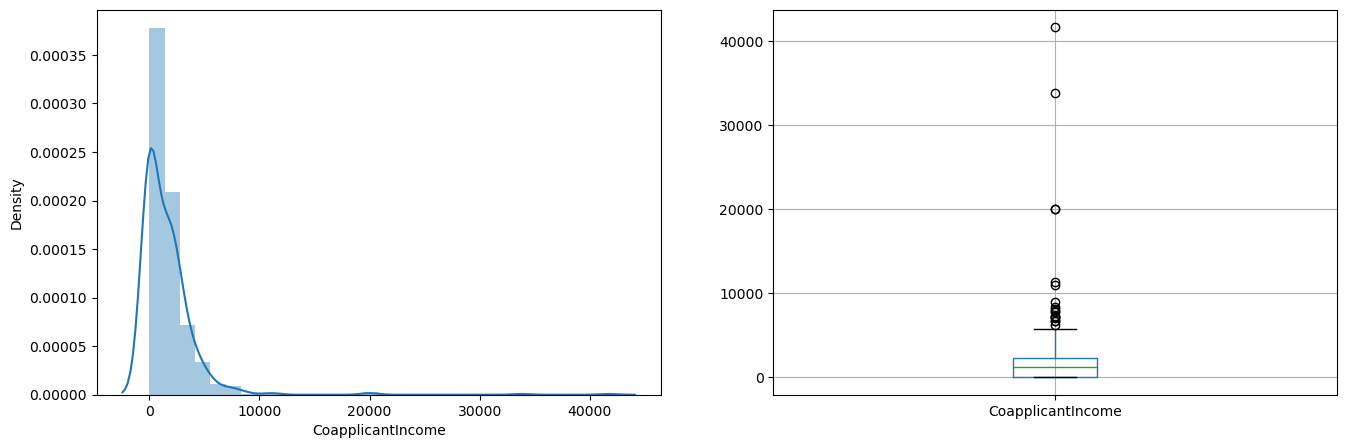

In [16]:
plt.figure(num=1)
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['CoapplicantIncome'],bins=30)
plt.subplot(122)
df.boxplot(column='CoapplicantIncome')
plt.show()

<Figure size 1800x1400 with 0 Axes>

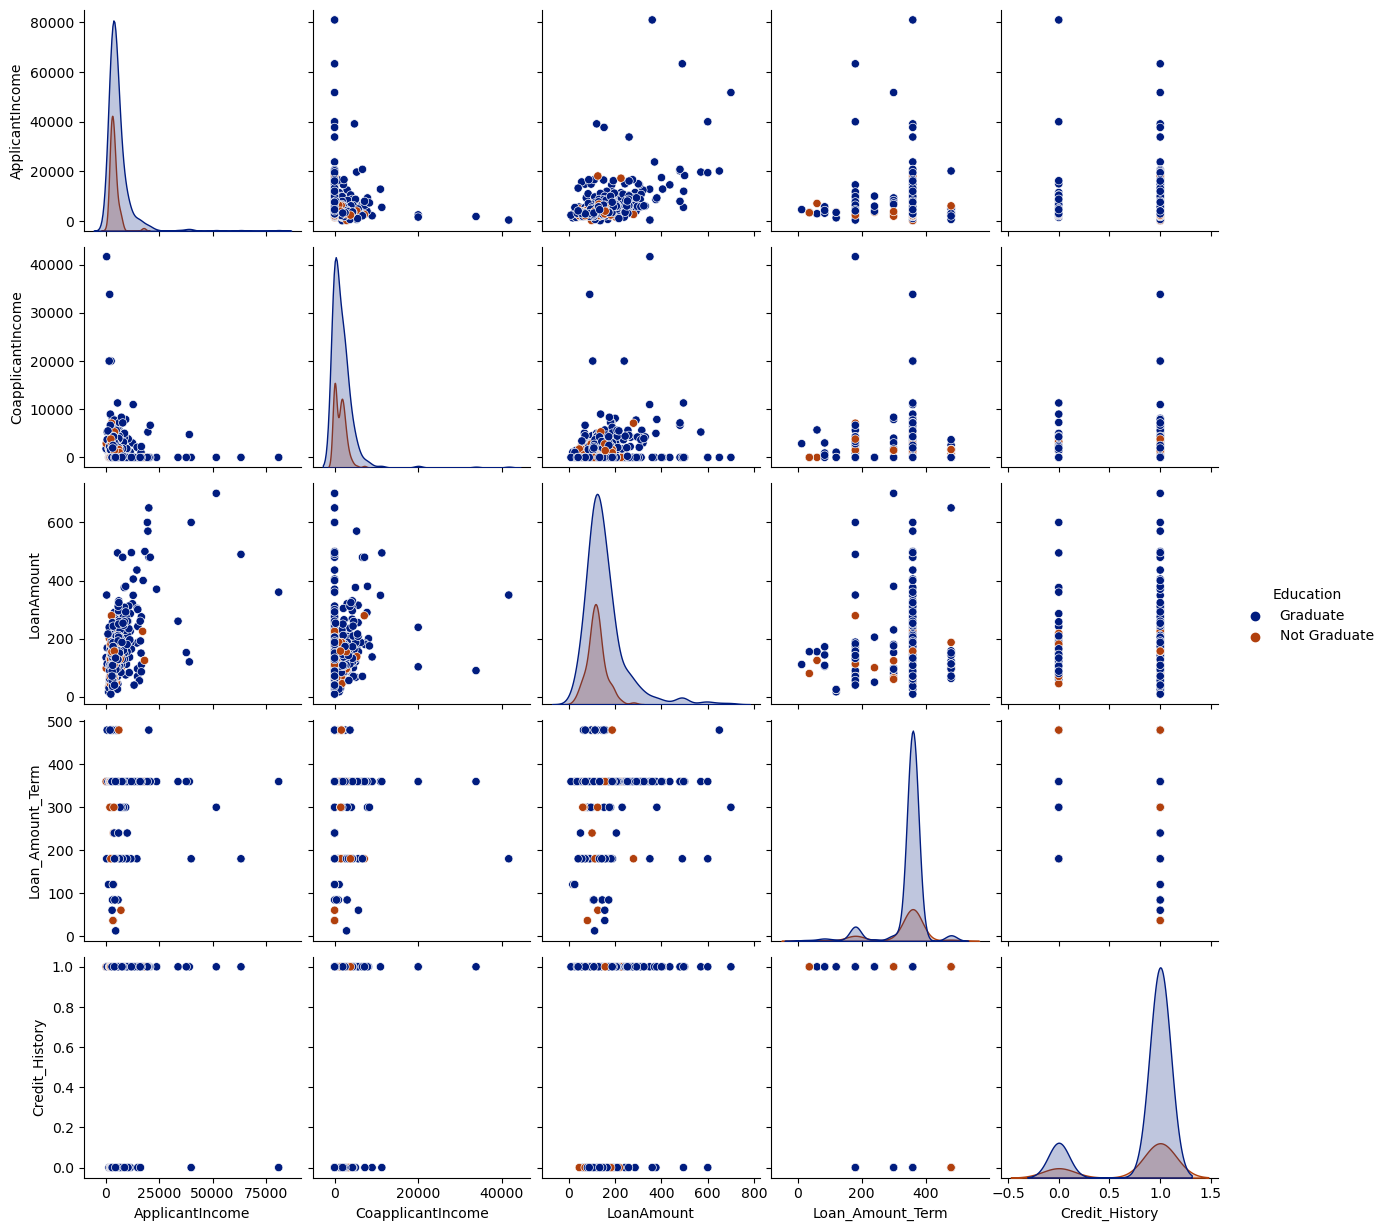

In [17]:
plt.figure(figsize=(18,14))
sns.pairplot(df,hue='Education', palette='dark')

In [19]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

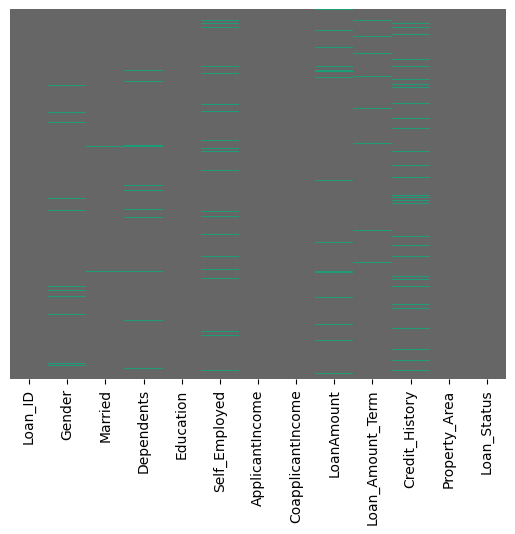

In [20]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='Dark2_r')

In [21]:
df.drop('Loan_ID',axis=1,inplace=True)

In [22]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [23]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [24]:
df[['Gender','Loan_Status']].value_counts()

Gender  Loan_Status
Male    Y              339
        N              150
Female  Y               75
        N               37
Name: count, dtype: int64

In [25]:
x=str(df["Gender"].mode().values[0])
df.fillna(x,inplace=True)

In [26]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
df["Married"].value_counts()

Married
Yes     398
No      213
Male      3
Name: count, dtype: int64

In [29]:
df[df["Married"]=="Male"]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
104,Male,Male,Male,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
228,Male,Male,Male,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
435,Female,Male,Male,Graduate,No,10047,0.0,Male,240.0,1.0,Semiurban,Y


In [30]:
marrid_wrong=df[df["Married"]=="Male"].index.values
df.drop(marrid_wrong,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
606,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
607,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
608,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
609,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [32]:
df['Dependents'].value_counts()

Dependents
0       345
1       102
2       101
3+       51
Male     12
Name: count, dtype: int64

In [33]:
df[df['Dependents']=="Male"]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
102,Male,Yes,Male,Graduate,No,13650,0.0,Male,360.0,1.0,Urban,Y
120,Male,Yes,Male,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,Male,Yes,Male,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
293,Female,No,Male,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,Male,Yes,Male,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,Male,No,Male,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,Male,Yes,Male,Graduate,Yes,5503,4490.0,70.0,Male,1.0,Semiurban,Y
346,Male,Yes,Male,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N
355,Female,No,Male,Graduate,No,3813,0.0,116.0,180.0,1.0,Urban,Y
517,Male,Yes,Male,Not Graduate,No,3074,1800.0,123.0,360.0,0.0,Semiurban,N


In [34]:
depnd=int(df['Dependents'].mode())
depnd

0

In [35]:
def get_Dependents(inp):
    if inp =="Male":
        return depnd
    elif inp == "3+" :
        return 3
    else :
        return int(inp)

In [36]:
df['Dependents']=df['Dependents'].apply(get_Dependents)

In [37]:
df['Dependents'].value_counts()

Dependents
0    357
1    102
2    101
3     51
Name: count, dtype: int64

In [38]:
df["Education"].value_counts()

Education
Graduate        477
Not Graduate    134
Name: count, dtype: int64

In [39]:
df["Self_Employed"].value_counts()

Self_Employed
No      497
Yes      82
Male     32
Name: count, dtype: int64

In [40]:
df.drop(df[df['Self_Employed']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,Male,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
574,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
575,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
576,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
577,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [41]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome
count,579.000000,579.000000,579.000000
mean,0.751295,5373.886010,1576.599171
std,1.013906,5775.117538,2491.340803
min,0.000000,150.000000,0.000000
25%,0.000000,2875.500000,0.000000
50%,0.000000,3833.000000,1167.000000
75%,1.500000,5818.500000,2279.000000
max,3.000000,81000.000000,33837.000000


In [42]:
df.drop(df[df['LoanAmount']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
554,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
555,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
556,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
557,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [43]:
df["Credit_History"].value_counts()

Credit_History
1.0     431
0.0      84
Male     44
Name: count, dtype: int64

In [44]:
df.drop(df[df['Credit_History']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
510,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
511,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
512,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
513,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [45]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    429
180.0     38
Male      13
480.0     13
300.0     10
120.0      3
84.0       3
60.0       2
240.0      2
36.0       2
Name: count, dtype: int64

In [46]:
df.drop(df[df['Loan_Amount_Term']=="Male"].index,inplace=True)
df.reset_index(drop=True)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
497,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
498,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
499,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
500,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [47]:
df.select_dtypes(include="O")

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,128.0,360.0,1.0,Rural,N
2,Male,Yes,Graduate,Yes,66.0,360.0,1.0,Urban,Y
3,Male,Yes,Not Graduate,No,120.0,360.0,1.0,Urban,Y
4,Male,No,Graduate,No,141.0,360.0,1.0,Urban,Y
5,Male,Yes,Graduate,Yes,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...
609,Female,No,Graduate,No,71.0,360.0,1.0,Rural,Y
610,Male,Yes,Graduate,No,40.0,180.0,1.0,Rural,Y
611,Male,Yes,Graduate,No,253.0,360.0,1.0,Urban,Y
612,Male,Yes,Graduate,No,187.0,360.0,1.0,Urban,Y


In [48]:
df['LoanAmount']=df['LoanAmount'].apply(lambda a : int(a))

In [49]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(lambda a : int(a))

In [50]:
df['Credit_History']=df['Credit_History'].apply(lambda a : int(a))

In [51]:
df.select_dtypes(include="O")

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
1,Male,Yes,Graduate,No,Rural,N
2,Male,Yes,Graduate,Yes,Urban,Y
3,Male,Yes,Not Graduate,No,Urban,Y
4,Male,No,Graduate,No,Urban,Y
5,Male,Yes,Graduate,Yes,Urban,Y
...,...,...,...,...,...,...
609,Female,No,Graduate,No,Rural,Y
610,Male,Yes,Graduate,No,Rural,Y
611,Male,Yes,Graduate,No,Urban,Y
612,Male,Yes,Graduate,No,Urban,Y


# Encoding techniques

In [52]:
encoded=pd.get_dummies(df[['Gender','Married','Education','Self_Employed']],dtype=int)
encoded.reset_index(drop=True)
encoded

,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,0,1,0,1,1,0,1,0
2,0,1,0,1,1,0,0,1
3,0,1,0,1,0,1,1,0
4,0,1,1,0,1,0,1,0
5,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...
609,1,0,1,0,1,0,1,0
610,0,1,0,1,1,0,1,0
611,0,1,0,1,1,0,1,0
612,0,1,0,1,1,0,1,0


In [53]:
#df['Gender']=df['Gender'].replace({'Male':0,'Female':1})
#df['Married']=df['Married'].replace({'No':0,'Yes':1})
#df['Education']=df['Education'].replace({'Not Graduate':0,'Graduate':1})
#df['Self_Employed']=df['Self_Employed'].replace({'No':0,'Yes':1})

In [54]:
df = pd.concat([df,encoded],axis=1)

In [55]:
df.drop(['Gender','Married','Education','Self_Employed'],axis=1,inplace=True)

In [56]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,1,4583,1508.0,128,360,1,Rural,N,0,1,0,1,1,0,1,0
2,0,3000,0.0,66,360,1,Urban,Y,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120,360,1,Urban,Y,0,1,0,1,0,1,1,0
4,0,6000,0.0,141,360,1,Urban,Y,0,1,1,0,1,0,1,0
5,2,5417,4196.0,267,360,1,Urban,Y,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71,360,1,Rural,Y,1,0,1,0,1,0,1,0
610,3,4106,0.0,40,180,1,Rural,Y,0,1,0,1,1,0,1,0
611,1,8072,240.0,253,360,1,Urban,Y,0,1,0,1,1,0,1,0
612,2,7583,0.0,187,360,1,Urban,Y,0,1,0,1,1,0,1,0


In [57]:
df.isnull().sum()

Dependents                0
ApplicantIncome           0
CoapplicantIncome         0
LoanAmount                0
Loan_Amount_Term          0
Credit_History            0
Property_Area             0
Loan_Status               0
Gender_Female             0
Gender_Male               0
Married_No                0
Married_Yes               0
Education_Graduate        0
Education_Not Graduate    0
Self_Employed_No          0
Self_Employed_Yes         0
dtype: int64

In [58]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes
1,1,4583,1508.0,128,360,1,Rural,N,0,1,0,1,1,0,1,0
2,0,3000,0.0,66,360,1,Urban,Y,0,1,0,1,1,0,0,1
3,0,2583,2358.0,120,360,1,Urban,Y,0,1,0,1,0,1,1,0
4,0,6000,0.0,141,360,1,Urban,Y,0,1,1,0,1,0,1,0
5,2,5417,4196.0,267,360,1,Urban,Y,0,1,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71,360,1,Rural,Y,1,0,1,0,1,0,1,0
610,3,4106,0.0,40,180,1,Rural,Y,0,1,0,1,1,0,1,0
611,1,8072,240.0,253,360,1,Urban,Y,0,1,0,1,1,0,1,0
612,2,7583,0.0,187,360,1,Urban,Y,0,1,0,1,1,0,1,0


In [59]:
encoded_p=pd.get_dummies(df[["Property_Area"]],dtype=int)
encoded_p.reset_index(drop=True)
encoded_p

,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
609,1,0,0
610,1,0,0
611,0,0,1
612,0,0,1


In [60]:
df = pd.concat([df,encoded_p],axis=1)

In [61]:
df.drop('Property_Area',axis=1,inplace=True)

In [62]:
df.reset_index(drop=True)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,4583,1508.0,128,360,1,N,0,1,0,1,1,0,1,0,1,0,0
1,0,3000,0.0,66,360,1,Y,0,1,0,1,1,0,0,1,0,0,1
2,0,2583,2358.0,120,360,1,Y,0,1,0,1,0,1,1,0,0,0,1
3,0,6000,0.0,141,360,1,Y,0,1,1,0,1,0,1,0,0,0,1
4,2,5417,4196.0,267,360,1,Y,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,0,2900,0.0,71,360,1,Y,1,0,1,0,1,0,1,0,1,0,0
498,3,4106,0.0,40,180,1,Y,0,1,0,1,1,0,1,0,1,0,0
499,1,8072,240.0,253,360,1,Y,0,1,0,1,1,0,1,0,0,0,1
500,2,7583,0.0,187,360,1,Y,0,1,0,1,1,0,1,0,0,0,1


In [63]:
#df['Property_Area']=df['Property_Area'].replace({'Rural':0,'Semiurban':1,'Urban':2})

In [64]:
encoding=LabelEncoder()

In [65]:
encoded=encoding.fit_transform(df["Loan_Status"])

In [66]:
df["Loan_Status"]=encoding.fit_transform(df["Loan_Status"])

In [67]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,4583,1508.0,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
2,0,3000,0.0,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
3,0,2583,2358.0,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
4,0,6000,0.0,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1
5,2,5417,4196.0,267,360,1,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,2900,0.0,71,360,1,1,1,0,1,0,1,0,1,0,1,0,0
610,3,4106,0.0,40,180,1,1,0,1,0,1,1,0,1,0,1,0,0
611,1,8072,240.0,253,360,1,1,0,1,0,1,1,0,1,0,0,0,1
612,2,7583,0.0,187,360,1,1,0,1,0,1,1,0,1,0,0,0,1


In [68]:
scaler=StandardScaler()

In [69]:
df['ApplicantIncome']=scaler.fit_transform(df[['ApplicantIncome']])

In [70]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,-0.148029,1508.0,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.411512,0.0,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.480919,2358.0,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.087823,0.0,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1
5,2,-0.009214,4196.0,267,360,1,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,-0.428156,0.0,71,360,1,1,1,0,1,0,1,0,1,0,1,0,0
610,3,-0.227424,0.0,40,180,1,1,0,1,0,1,1,0,1,0,1,0,0
611,1,0.432697,240.0,253,360,1,1,0,1,0,1,1,0,1,0,0,0,1
612,2,0.351306,0.0,187,360,1,1,0,1,0,1,1,0,1,0,0,0,1


In [71]:
df['CoapplicantIncome']=scaler.fit_transform(df[['CoapplicantIncome']])

In [72]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,-0.148029,-0.021491,128,360,1,0,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.411512,-0.607162,66,360,1,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.480919,0.308629,120,360,1,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.087823,-0.607162,141,360,1,1,0,1,1,0,1,0,1,0,0,0,1
5,2,-0.009214,1.022465,267,360,1,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,-0.428156,-0.607162,71,360,1,1,1,0,1,0,1,0,1,0,1,0,0
610,3,-0.227424,-0.607162,40,180,1,1,0,1,0,1,1,0,1,0,1,0,0
611,1,0.432697,-0.513952,253,360,1,1,0,1,0,1,1,0,1,0,0,0,1
612,2,0.351306,-0.607162,187,360,1,1,0,1,0,1,1,0,1,0,0,0,1


In [73]:
scaler_minmax = MinMaxScaler()

In [74]:
df['LoanAmount']=scaler_minmax.fit_transform(df[['LoanAmount']])

In [75]:
df['Loan_Amount_Term']=scaler_minmax.fit_transform(df[['Loan_Amount_Term']])

In [76]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,-0.148029,-0.021491,0.172214,0.729730,1,0,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.411512,-0.607162,0.082489,0.729730,1,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.480919,0.308629,0.160637,0.729730,1,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.087823,-0.607162,0.191027,0.729730,1,1,0,1,1,0,1,0,1,0,0,0,1
5,2,-0.009214,1.022465,0.373372,0.729730,1,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,-0.428156,-0.607162,0.089725,0.729730,1,1,1,0,1,0,1,0,1,0,1,0,0
610,3,-0.227424,-0.607162,0.044863,0.324324,1,1,0,1,0,1,1,0,1,0,1,0,0
611,1,0.432697,-0.513952,0.353111,0.729730,1,1,0,1,0,1,1,0,1,0,0,0,1
612,2,0.351306,-0.607162,0.257598,0.729730,1,1,0,1,0,1,1,0,1,0,0,0,1


In [77]:
encoded=encoding.fit_transform(df["Dependents"])

In [78]:
df["Dependents"]=encoding.fit_transform(df["Dependents"])

In [79]:
df

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,-0.148029,-0.021491,0.172214,0.729730,1,0,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.411512,-0.607162,0.082489,0.729730,1,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.480919,0.308629,0.160637,0.729730,1,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.087823,-0.607162,0.191027,0.729730,1,1,0,1,1,0,1,0,1,0,0,0,1
5,2,-0.009214,1.022465,0.373372,0.729730,1,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,-0.428156,-0.607162,0.089725,0.729730,1,1,1,0,1,0,1,0,1,0,1,0,0
610,3,-0.227424,-0.607162,0.044863,0.324324,1,1,0,1,0,1,1,0,1,0,1,0,0
611,1,0.432697,-0.513952,0.353111,0.729730,1,1,0,1,0,1,1,0,1,0,0,0,1
612,2,0.351306,-0.607162,0.257598,0.729730,1,1,0,1,0,1,1,0,1,0,0,0,1


In [80]:
X=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [81]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 502, dtype: int32

In [82]:
X

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
1,1,-0.148029,-0.021491,0.172214,0.729730,1,0,1,0,1,1,0,1,0,1,0,0
2,0,-0.411512,-0.607162,0.082489,0.729730,1,0,1,0,1,1,0,0,1,0,0,1
3,0,-0.480919,0.308629,0.160637,0.729730,1,0,1,0,1,0,1,1,0,0,0,1
4,0,0.087823,-0.607162,0.191027,0.729730,1,0,1,1,0,1,0,1,0,0,0,1
5,2,-0.009214,1.022465,0.373372,0.729730,1,0,1,0,1,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,-0.428156,-0.607162,0.089725,0.729730,1,1,0,1,0,1,0,1,0,1,0,0
610,3,-0.227424,-0.607162,0.044863,0.324324,1,0,1,0,1,1,0,1,0,1,0,0
611,1,0.432697,-0.513952,0.353111,0.729730,1,0,1,0,1,1,0,1,0,0,0,1
612,2,0.351306,-0.607162,0.257598,0.729730,1,0,1,0,1,1,0,1,0,0,0,1


In [83]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

# XGBoost

In [84]:
import xgboost

In [85]:
from xgboost import XGBClassifier, XGBRegressor

In [86]:
xgbt = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimators = 10,
             random_state = 123)

In [87]:
xgbt.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [88]:
xgbt_pred = xgbt.predict(X_test)

In [89]:
from sklearn.metrics import accuracy_score

In [90]:
accuracy_score(y_test, xgbt_pred)

0.8415841584158416

In [91]:
xgbt.score(X_train, y_train)

0.8029925187032418

In [92]:
xgbt.score(X_test, y_test)

0.8415841584158416

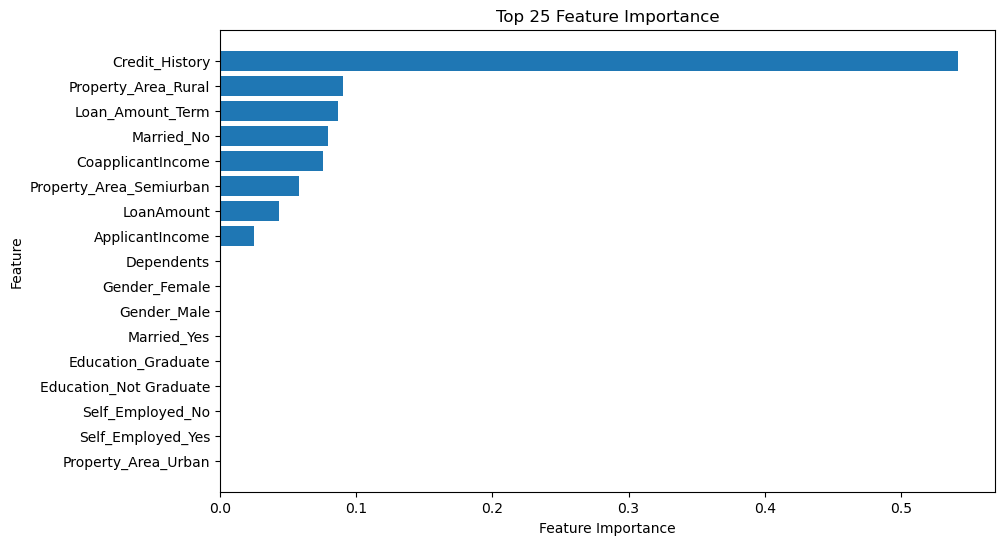

In [93]:
feature_importance = xgbt.feature_importances_
feature_names = X_train.columns

feature_importance_dict = dict(zip(feature_names, feature_importance))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
top_features = 25
top_features_names, top_features_importance = zip(*sorted_feature_importance[:top_features])
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_features_names)), top_features_importance, align='center')
plt.yticks(range(len(top_features_names)), top_features_names)
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top {} Feature Importance'.format(top_features))
plt.gca().invert_yaxis()
plt.show()

In [94]:
top_features_names

('Credit_History',
 'Property_Area_Rural',
 'Loan_Amount_Term',
 'Married_No',
 'CoapplicantIncome',
 'Property_Area_Semiurban',
 'LoanAmount',
 'ApplicantIncome',
 'Dependents',
 'Gender_Female',
 'Gender_Male',
 'Married_Yes',
 'Education_Graduate',
 'Education_Not Graduate',
 'Self_Employed_No',
 'Self_Employed_Yes',
 'Property_Area_Urban')

In [95]:
selected_features =["Credit_History","Property_Area_Rural","Married_No","CoapplicantIncome","Property_Area_Semiurban","LoanAmount","ApplicantIncome"]

In [96]:
X = df[selected_features]
y = df['Loan_Status']

In [97]:
X

,Credit_History,Property_Area_Rural,Married_No,CoapplicantIncome,Property_Area_Semiurban,LoanAmount,ApplicantIncome
1,1,1,0,-0.021491,0,0.172214,-0.148029
2,1,0,0,-0.607162,0,0.082489,-0.411512
3,1,0,0,0.308629,0,0.160637,-0.480919
4,1,0,1,-0.607162,0,0.191027,0.087823
5,1,0,0,1.022465,0,0.373372,-0.009214
...,...,...,...,...,...,...,...
609,1,1,1,-0.607162,0,0.089725,-0.428156
610,1,1,0,-0.607162,0,0.044863,-0.227424
611,1,0,0,-0.513952,0,0.353111,0.432697
612,1,0,0,-0.607162,0,0.257598,0.351306


In [98]:
y

1      0
2      1
3      1
4      1
5      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 502, dtype: int32

In [99]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [100]:
xgbt1 = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimators = 10,
             random_state = 123)

In [101]:
xgbt1.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [102]:
xgbt1_pred = xgbt1.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score

In [104]:
accuracy_score(y_test, xgbt1_pred)

0.8415841584158416

In [105]:
xgbt1.score(X_train, y_train)

0.8029925187032418

In [106]:
xgbt1.score(X_test, y_test)

0.8415841584158416

In [107]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgbt1_pred))

              precision    recall  f1-score   support

           0       0.90      0.56      0.69        32
           1       0.83      0.97      0.89        69

    accuracy                           0.84       101
   macro avg       0.86      0.77      0.79       101
weighted avg       0.85      0.84      0.83       101



# Smote

In [115]:
from imblearn.over_sampling import SMOTE

In [116]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15)

In [117]:
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

In [118]:
print("Class distribution after resampling: ")
print(y_train_resampled.value_counts())

Class distribution after resampling: 
Loan_Status
0    272
1    272
Name: count, dtype: int64


In [119]:
xgbt_sm = XGBClassifier(max_depth = 2,
             learning_rate = 0.2,
             objective  = "multi:softmax",
             num_class = 2,
             booster = "gbtree",
             n_estimators = 10,
             random_state = 123)

In [120]:
xgbt_sm.fit(X_train, y_train)

XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None, num_class=2,
              num_parallel_tree=None, ...)

In [121]:
xgbt_sm_pred = xgbt_sm.predict(X_test)

In [122]:
accuracy_score(y_test, xgbt_sm_pred)

0.8316831683168316

In [123]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgbt_sm_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        30
           1       0.81      1.00      0.89        71

    accuracy                           0.83       101
   macro avg       0.90      0.72      0.75       101
weighted avg       0.86      0.83      0.81       101



# LightGbm

In [124]:
import lightgbm as lgb

In [125]:
X_train.shape

(401, 7)

In [126]:
y.value_counts()

Loan_Status
1    343
0    159
Name: count, dtype: int64

In [127]:
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 5,
    #'is_unbalance': True,
    'scale_pos_weight': 0.75,
    'num_iterations': 100}

In [128]:
train_data = lgb.Dataset(X_train, label=y_train)
test_data = lgb.Dataset(X_test, label=y_test)

In [129]:
model = lgb.train(params, train_data, valid_sets=[test_data])

[LightGBM] [Info] Number of positive: 272, number of negative: 129
[LightGBM] [Debug] Dataset::GetMultiBinFromSparseFeatures: sparse rate 0.743142
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.299667
[LightGBM] [Debug] init for col-wise cost 0.000695 seconds, init for row-wise cost 0.000478 seconds
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001839 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Sparse Multi-Val Bin
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 401, number of used features: 7
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.678304 -> initscore=0.745990
[LightGBM] [Info] Start training from score 0.745990
[LightGBM] [Debug] Re-bagging, using 321 data to train
[LightGBM] [Warning] No further splits with positive

In [130]:
y_pred_lgb = model.predict(X_test)

In [131]:
from sklearn.metrics import confusion_matrix

In [132]:
confusion_matrix(y_test, y_pred_lgb.round())

array([[16, 14],
       [ 6, 65]], dtype=int64)

In [133]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print(f"Accuracy: {accuracy_score(y_test, y_pred_lgb.round())}")
print(f"Precision: {precision_score(y_test, y_pred_lgb.round())}")
print(f"Recall: {recall_score(y_test, y_pred_lgb.round())}")
print(f"F1 Score: {f1_score(y_test, y_pred_lgb.round())}")

Accuracy: 0.801980198019802
Precision: 0.8227848101265823
Recall: 0.9154929577464789
F1 Score: 0.8666666666666667


In [134]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_lgb.round()))

              precision    recall  f1-score   support

           0       0.73      0.53      0.62        30
           1       0.82      0.92      0.87        71

    accuracy                           0.80       101
   macro avg       0.78      0.72      0.74       101
weighted avg       0.79      0.80      0.79       101



# AdaBoost

In [135]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [136]:
base_estimator = DecisionTreeClassifier(max_depth=1)
adaboost = AdaBoostClassifier(estimator=base_estimator, n_estimators=50, random_state=42)

In [137]:
adaboost.fit(X_train, y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

In [138]:
y_pred_ad = adaboost.predict(X_test)

In [139]:
accuracy = accuracy_score(y_test, y_pred_ad)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7722772277227723


In [140]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_ad))

              precision    recall  f1-score   support

           0       0.68      0.43      0.53        30
           1       0.79      0.92      0.85        71

    accuracy                           0.77       101
   macro avg       0.74      0.67      0.69       101
weighted avg       0.76      0.77      0.75       101



In [141]:
confusion_matrix(y_test, y_pred_ad.round())

array([[13, 17],
       [ 6, 65]], dtype=int64)

# CatBoost

In [142]:
from catboost import CatBoostClassifier


model = CatBoostClassifier(iterations=200,
                          learning_rate=1,
                          depth=2)
# Fit model
model.fit(X_train, y_train)
# Get predictions
preds = model.predict(X_test)

0:	learn: 0.4614528	total: 171ms	remaining: 34s
1:	learn: 0.4568869	total: 175ms	remaining: 17.3s
2:	learn: 0.4529730	total: 179ms	remaining: 11.7s
3:	learn: 0.4493984	total: 185ms	remaining: 9.07s
4:	learn: 0.4486730	total: 190ms	remaining: 7.4s
5:	learn: 0.4362191	total: 193ms	remaining: 6.24s
6:	learn: 0.4331899	total: 197ms	remaining: 5.43s
7:	learn: 0.4220640	total: 201ms	remaining: 4.83s
8:	learn: 0.4191004	total: 206ms	remaining: 4.37s
9:	learn: 0.4118536	total: 210ms	remaining: 4s
10:	learn: 0.4103461	total: 214ms	remaining: 3.68s
11:	learn: 0.4059332	total: 219ms	remaining: 3.43s
12:	learn: 0.3971913	total: 222ms	remaining: 3.2s
13:	learn: 0.3882967	total: 226ms	remaining: 3s
14:	learn: 0.3822216	total: 230ms	remaining: 2.83s
15:	learn: 0.3715781	total: 233ms	remaining: 2.68s
16:	learn: 0.3634920	total: 237ms	remaining: 2.55s
17:	learn: 0.3591257	total: 240ms	remaining: 2.42s
18:	learn: 0.3569104	total: 243ms	remaining: 2.32s
19:	learn: 0.3545383	total: 247ms	remaining: 2.22s


In [143]:
from sklearn.metrics import accuracy_score

In [144]:
model.score(X_train, y_train)

0.9975062344139651

# Random Forest

In [145]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 100, random_state = None)
rf.fit(X_train,y_train)

RandomForestClassifier()

In [146]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7326732673267327


In [147]:
print("Classification Report for Random Forest:""\n",classification_report(y_test, y_pred))

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.55      0.57      0.56        30
           1       0.81      0.80      0.81        71

    accuracy                           0.73       101
   macro avg       0.68      0.68      0.68       101
weighted avg       0.74      0.73      0.73       101



In [148]:
from sklearn.metrics import precision_recall_fscore_support

In [149]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, labels=[0, 1])

In [150]:
precision, recall, f1, support = precision_recall_fscore_support(y_test, y_pred, average=None)
weighted_f1_score = (f1 * support).sum() / support.sum()
print(f"Weighted F1 Score: {weighted_f1_score:.4f}")

Weighted F1 Score: 0.7339


# Hyper Parameter Tuning

In [156]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0]
}

xgb_model = XGBClassifier()
grid_search = GridSearchCV(xgb_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)
accuracy = best_xgb_model.score(X_test, y_test)
print(f"Best hyperparameters: {best_params}")
print(f"Best accuracy: {accuracy:.4f}")

Best hyperparameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best accuracy: 0.8317


In [157]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2]
}

xgb_model = XGBClassifier()
random_search = RandomizedSearchCV(
    xgb_model,
    param_distributions=param_grid,
    n_iter=10,
    cv=5,
    scoring='accuracy',
    random_state=42
)

random_search.fit(X_train, y_train)
best_params = random_search.best_params_

best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)
accuracy = best_xgb_model.score(X_test, y_test)
print(f"Best hyperparameters: {best_params}")
print(f"Test set accuracy: {accuracy:.4f}")

Best hyperparameters: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.01, 'gamma': 0.1, 'colsample_bytree': 0.9}
Test set accuracy: 0.8317


In [158]:
xgbt_pred = best_xgb_model.predict(X_test)

In [159]:
from sklearn.metrics import classification_report
print(classification_report(y_test,xgbt_pred))

              precision    recall  f1-score   support

           0       1.00      0.43      0.60        30
           1       0.81      1.00      0.89        71

    accuracy                           0.83       101
   macro avg       0.90      0.72      0.75       101
weighted avg       0.86      0.83      0.81       101

